In [72]:
# Import packages
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in CSV and list columns
df = pd.read_csv('medical_clean.csv')
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [3]:
# Encode categorical features with OneHotEncoding
# Define categorical features
# Apply OneHotEncoding
encoded_df = pd.get_dummies(df, columns=['Area'])
encoded_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Area_Rural,Area_Suburban,Area_Urban
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3,2,2,4,3,3,4,0,1,0
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4,3,4,4,4,3,3,0,0,1
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,4,4,4,3,4,3,3,0,1,0
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,5,5,3,4,5,5,5,0,1,0
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,1,3,3,5,3,4,3,1,0,0


In [4]:
# Scale numeric features with StandardScaler
numeric_features = ['Population', 'Lat', 'Lng']
scaler = StandardScaler()
encoded_df[numeric_features] = scaler.fit_transform(encoded_df[numeric_features])
encoded_df[numeric_features].head()

,Population,Lat,Lng
0,-0.473168,-0.814668,0.297134
1,0.090242,-1.463305,0.395522
2,0.482983,0.886966,-0.354788
3,-0.526393,0.952530,-0.149403
4,-0.315586,-0.213252,0.943984


In [5]:
encoded_df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8', 'Area_Rural', 'Area_Suburban',
       'Area_Urban'],
      dtype='object')

In [6]:
features = ['Population', 'Lat', 'Lng', 'Area_Rural', 'Area_Suburban', 'Area_Urban']
X=encoded_df[features]
X.head()

,Population,Lat,Lng,Area_Rural,Area_Suburban,Area_Urban
0,-0.473168,-0.814668,0.297134,0,1,0
1,0.090242,-1.463305,0.395522,0,0,1
2,0.482983,0.886966,-0.354788,0,1,0
3,-0.526393,0.952530,-0.149403,0,1,0
4,-0.315586,-0.213252,0.943984,1,0,0


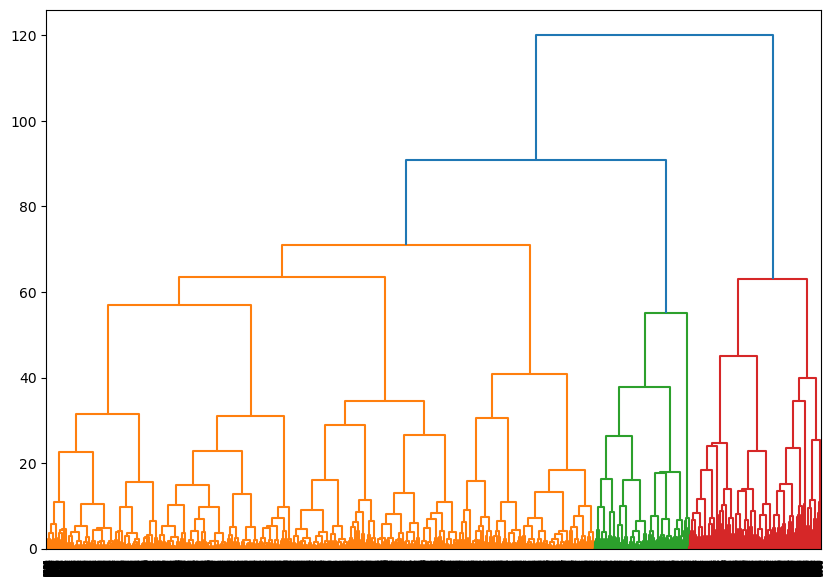

In [7]:
linked = linkage(X, method='ward')
plt.figure(figsize=(10,7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

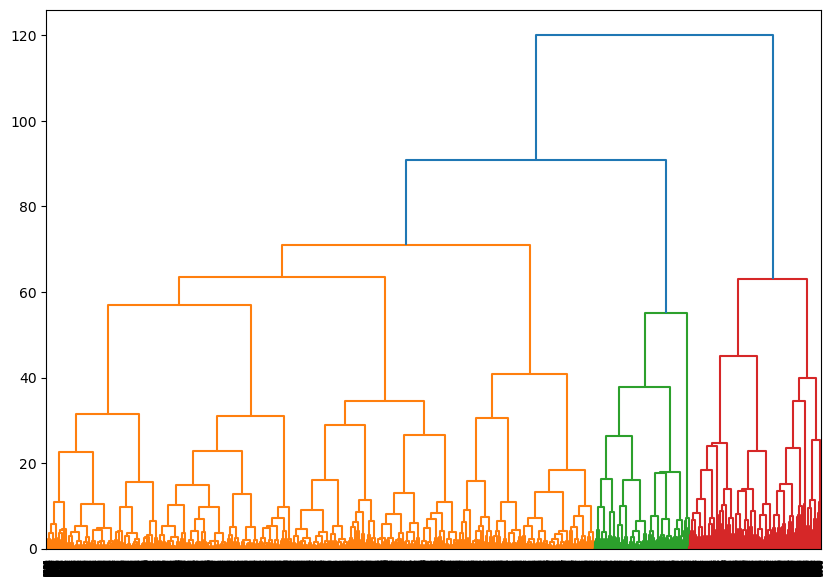

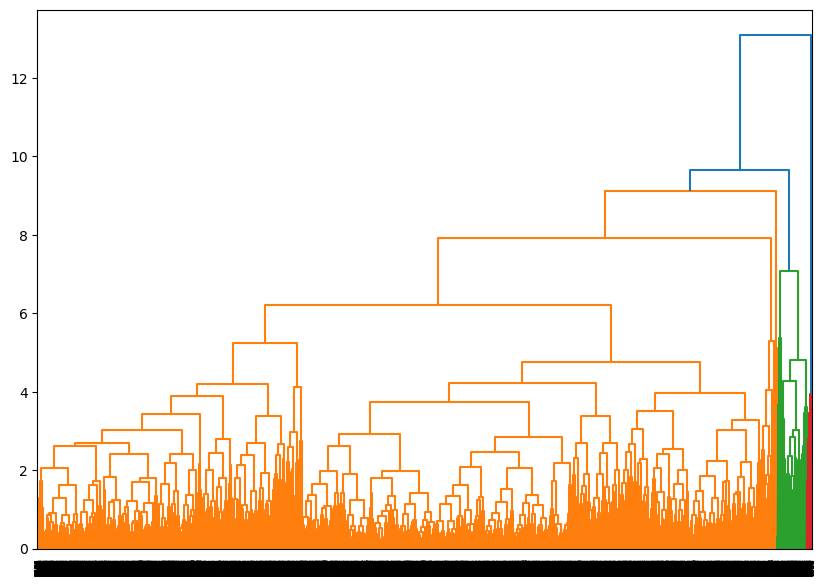

KeyboardInterrupt: 

In [83]:
linkage_methods = ['ward', 'complete', 'average', 'single']

for method in linkage_methods:

    linked = linkage(X, method=method)
    plt.figure(figsize=(10,7))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.show()
    

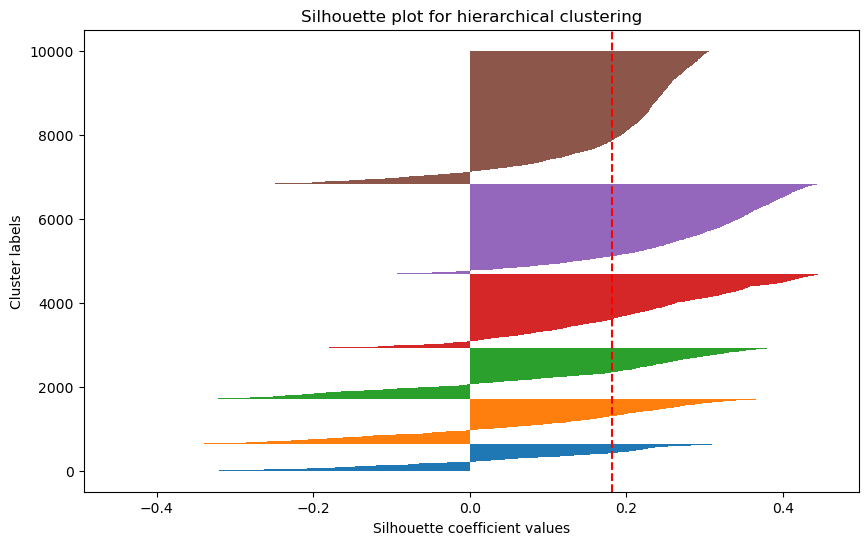

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [82]:
linkage_methods = ['ward', 'complete', 'average', 'single']

for method in linkage_methods:

    linked = linkage(X, method=method)


    clusters = fcluster(linked, 60, criterion='distance')
    


    silhouette_vals = silhouette_samples(X, clusters)
    cluster_labels = np.unique(clusters)

    plt.figure(figsize=(10, 6))
    y_ax_lower, y_ax_upper = 0, 0
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none')
        y_ax_lower += len(c_silhouette_vals)

    plt.axvline(silhouette_score(X, clusters), color="red", linestyle="--")
    plt.xlabel('Silhouette coefficient values')
    plt.ylabel('Cluster labels')
    plt.title('Silhouette plot for hierarchical clustering')
    plt.show()



In [ ]:
# 50 = 8, 56 = 7, 63 = 6, 64 = 4, 80 = 3
# Cut clusters at specified distortion amount
potential_cutpoints = [50, 56, 63, 64, 80]
for cut in potential_cutpoints:
    clusters = fcluster(linked, cut, criterion='distance')
    
    # Assign clusters back to original dataframe
    df['Cluster'] = clusters
    print(f'Cut {cut} produced {df["Cluster"].nunique()} clusters:')
    print(df['Cluster'].value_counts())
    print()


    silhouette_vals = silhouette_samples(X, clusters)
    cluster_labels = np.unique(clusters)

    plt.figure(figsize=(10, 6))
    y_ax_lower, y_ax_upper = 0, 0
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none')
        y_ax_lower += len(c_silhouette_vals)

    plt.axvline(silhouette_score(X, clusters), color="red", linestyle="--")
    plt.xlabel('Silhouette coefficient values')
    plt.ylabel('Cluster labels')
    plt.title('Silhouette plot for hierarchical clustering')
    plt.show()



In [67]:
# Perform cut again with optimal cut point
clusters = fcluster(linked, 56, criterion='distance')
    
# Assign clusters back to original dataframe
df['Cluster'] = clusters
print(f'Cut 56 produced {df["Cluster"].nunique()} clusters:')
print(df['Cluster'].value_counts())

Cut 56 produced 7 clusters:
5    2153
4    1757
6    1733
7    1432
3    1222
2    1061
1     642
Name: Cluster, dtype: int64


In [68]:
replacement_dict = {
    'Yes': '1',
    'No': '0'
}
df['ReAdmis'] = df['ReAdmis'].replace(replacement_dict)
df['ReAdmis'] = df['ReAdmis'].astype(int)
df['ReAdmis'].value_counts()

0    6331
1    3669
Name: ReAdmis, dtype: int64

In [69]:
df.groupby('Cluster')['ReAdmis'].mean()

Cluster
1    0.387850
2    0.360980
3    0.336334
4    0.373933
5    0.363214
6    0.361223
7    0.391760
Name: ReAdmis, dtype: float64

In [70]:
df.groupby('Cluster')[['Population', 'Lat', 'Lng']].agg(['mean', 'std', 'median'])

Population                               Lat                       \
                 mean           std   median       mean       std     median   
Cluster                                                                        
1        36366.451713  21583.881132  32714.5  36.878678  6.077457  36.777570   
2        34953.303487  13343.797349  33435.0  34.426106  6.125682  34.246920   
3         2180.621113   3241.613044    891.0  41.900735  6.841100  40.599745   
4         4573.153102   5833.053851   2054.0  33.672668  3.174631  33.704890   
5         5892.265676   8346.826648   1983.0  40.126912  3.219181  40.391520   
6         4394.041546   5328.237479   2026.0  40.726321  3.358072  40.877950   
7         5739.629888   7854.540453   2046.5  41.879362  2.273322  41.555835   

                Lng                         
               mean        std      median  
Cluster                                     
1       -117.463748  13.117713 -118.275595  
2        -84.413922   8.599792  -83.408530  
3       -114.641334  13.269792 -114.774700  
4        -88.767291   6.400139  -88.870220  
5        -86.106411   9.260882  -85.908050  
6        -83.046796   7.887293  -82.250770  
7        -85.260377  10.201059  -84.441690

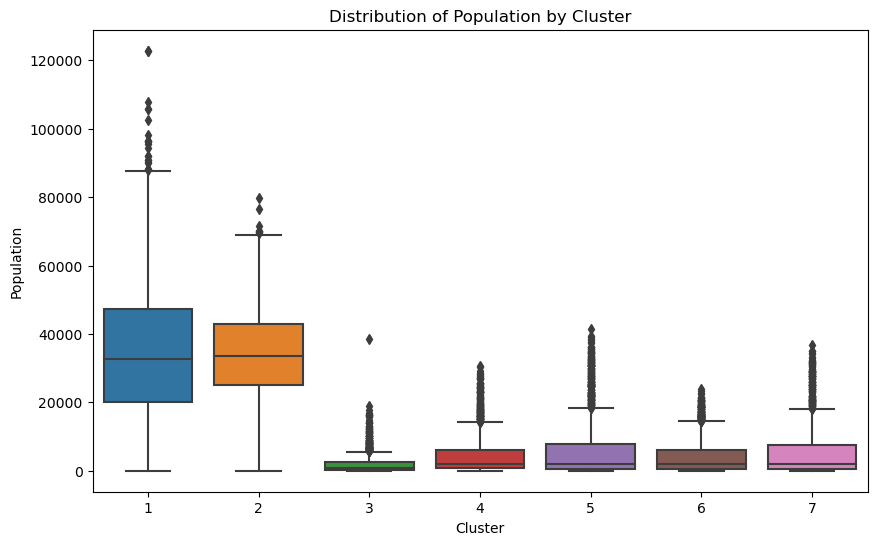

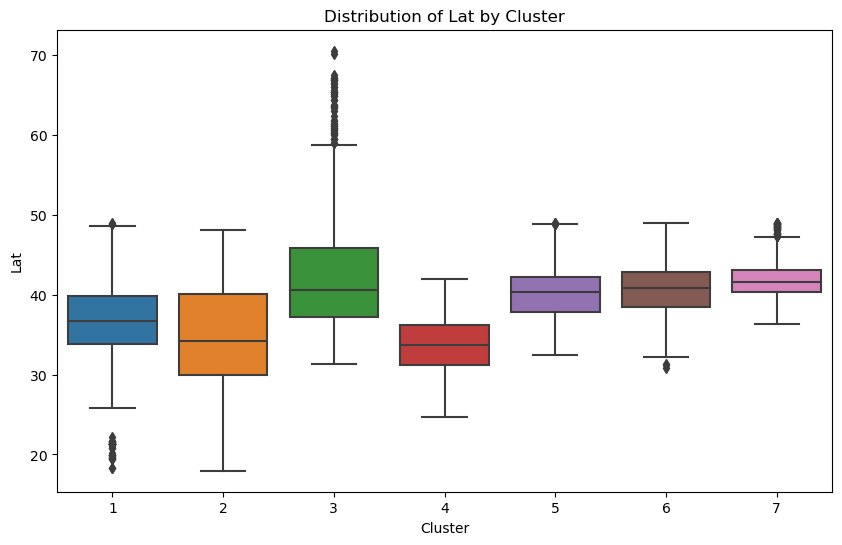

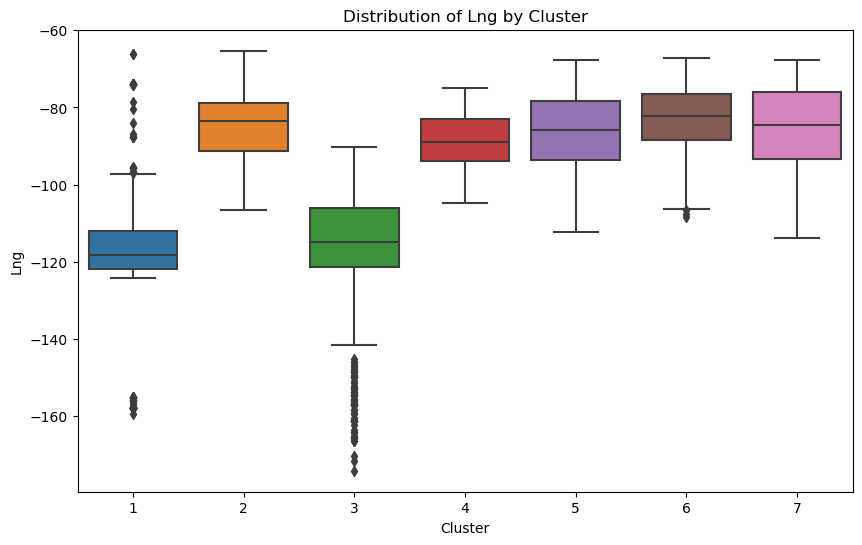

In [73]:
numeric_features = ['Population', 'Lat', 'Lng']
for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

In [39]:
df.groupby('Cluster')[['Area']].value_counts()

Cluster  Area    
1        Suburban     224
         Urban        211
         Rural        207
2        Rural        457
         Urban        377
         Suburban     227
3        Urban         28
         Suburban      23
         Rural         19
4        Rural        569
         Urban        319
         Suburban     264
5        Urban        936
         Suburban     437
         Rural        384
6        Suburban    2153
7        Rural       1733
8        Urban       1432
dtype: int64

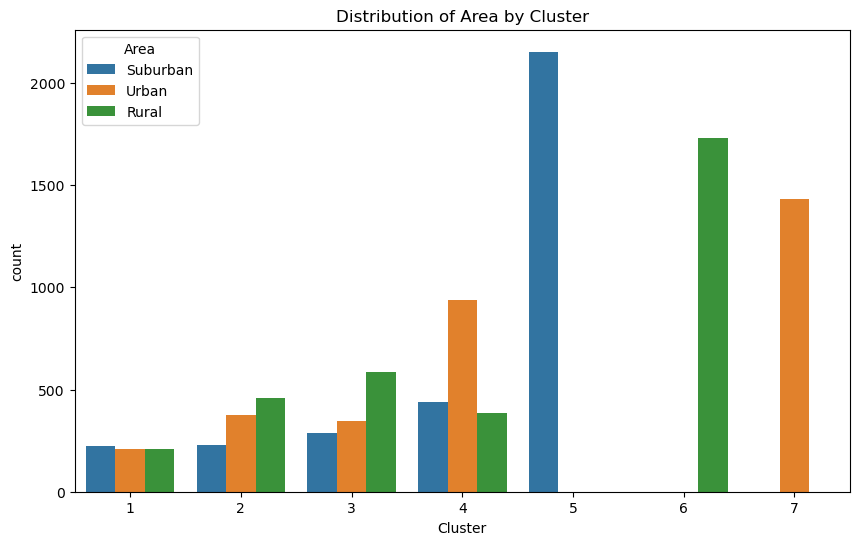

In [74]:
plt.figure(figsize=(10,6))
sns.countplot(x='Cluster', hue='Area', data=df)
plt.title('Distribution of Area by Cluster')
plt.show()

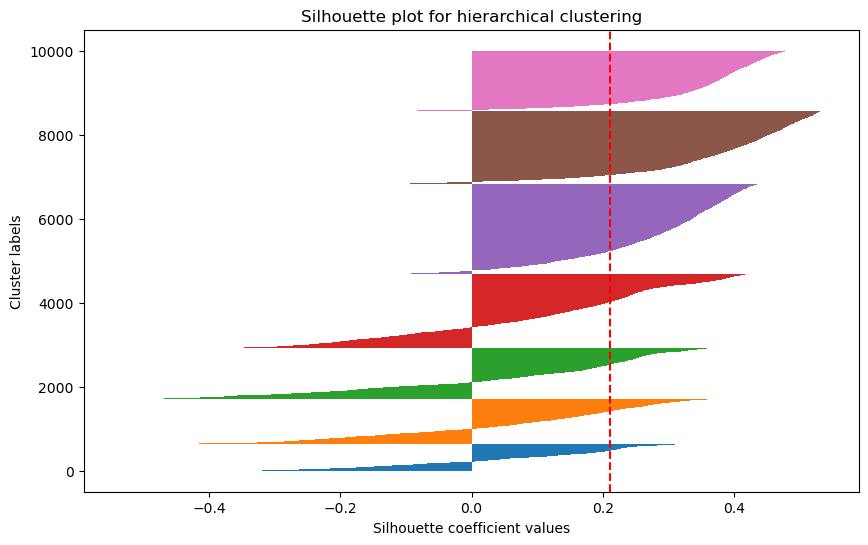

In [75]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

silhouette_vals = silhouette_samples(X, clusters)
cluster_labels = np.unique(clusters)

plt.figure(figsize=(10, 6))
y_ax_lower, y_ax_upper = 0, 0
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[clusters == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none')
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_score(X, clusters), color="red", linestyle="--")
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster labels')
plt.title('Silhouette plot for hierarchical clustering')
plt.show()


In [78]:
from scipy.spatial.distance import cdist

def calculate_wcss_bcss(X, clusters):
    cluster_centers = pd.DataFrame(X).groupby(clusters).mean().values
    wcss = sum(np.min(cdist(X, cluster_centers, 'euclidean'), axis=1))
    bcss = sum(np.max(cdist(X, cluster_centers, 'euclidean'), axis=1))
    return wcss, bcss

wcss, bcss = calculate_wcss_bcss(X, clusters)
print(f'WCSS: {wcss}, BCSS: {bcss}')


WCSS: 10941.34426132718, BCSS: 34080.00959742442
